In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]


In [2]:
df = pd.read_pickle('data/prop_data_gap_12_4_1.pkl').drop_duplicates()

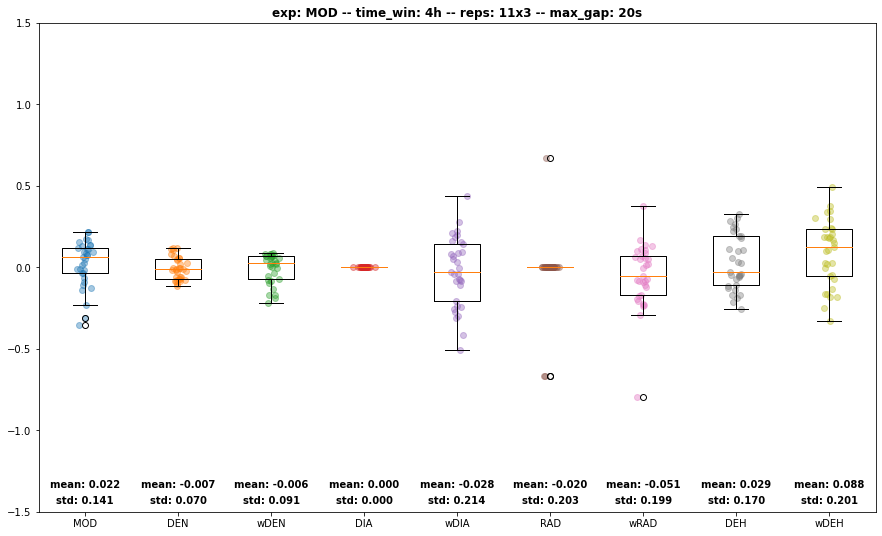

In [4]:
#===== RELATIVE DIFFERENCE =====

# --------- FILTERING ------------
reps_discarded = [20,41]

for exp in ['MOD']:
    time_win = 4 #h
    max_gap = 20 #s

    df_filt = df.loc[(df.time_win==3600 * time_win) & 
                     (df.max_gap==max_gap) & 
                    (df.exp.isin([exp+'a',exp+'b'])) & 
                    (~df.rep.isin(reps_discarded))]
    df_filt.insert(4,'h', [int(str(a)[-8:-6]) for a in df_filt.start])
    df_filt = df_filt.sort_values(['rep','h'])

    # ---- dataframe of relative difference---- 
    #p = df_filt.columns[9:]
    p = ['MOD', 'DEN', 'wDEN', 'DIA', 'wDIA', 'RAD', 'wRAD', 'DEH', 'wDEH']
    df_rd = (df_filt[p].diff()/df_filt[p].rolling(2).mean()).iloc[1::2]
    df_rd.insert(0,'rep', df_filt.rep.iloc[1::2])
    df_rd.insert(1,'exp', [a[0:3] for a in df_filt.exp.iloc[1::2]])
    df_rd.insert(3,'start-b', list(df_filt.start.iloc[1::2]))

    vals, names, xs = [],[],[]
    for i, col in enumerate(df_rd[p].columns):
        vals.append(df_rd[col].values)
        names.append(col)
        xs.append(np.random.normal(i + 1, 0.04, df_rd[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
    
    plt.figure()
    box_plot = plt.boxplot(vals, labels=names)
    for x, val in zip(xs, vals):
        plt.scatter(x, val, alpha=0.4)

    means = df_rd[p].mean()
    stds =  df_rd[p].std()

    for xtick in range(len(p)):
        plt.text(xtick+1,-1.35, 'mean: {:.3f}'.format(means[xtick]), 
                  horizontalalignment='center',size='medium',color='k',weight='semibold')
        plt.text(xtick+1,-1.45, 'std: {:.3f}'.format(stds[xtick]), 
                      horizontalalignment='center',size='medium',color='k',weight='semibold')

    plt.ylim([-1.5,1.5])
    fig = plt.title('exp: ' + exp + 
                    ' -- time_win: ' + str(time_win) + 'h'
                    ' -- reps: ' + str(int(len(df_rd)*time_win/12)) + 'x' + str(int(12/time_win)) + 
                    ' -- max_gap: ' + str(max_gap) + 's',
                   fontweight="bold")

In [148]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_rd)

     rep  exp       MOD             start-b       DEN      wDEN  DIA  \
3777  16  DIA -0.060445 2021-09-13 09:00:00  -0.00001 -0.096951  0.0   
3873  19  DIA -0.049159 2021-10-05 09:00:00  0.020426 -0.117061  0.0   
3937  21  DIA -0.069442 2021-10-08 09:00:00  0.047505   0.02818  0.0   
4161  28  DIA  0.097682 2021-10-20 09:00:00  0.026085 -0.079612  0.0   
4289  32  DIA  0.156231 2021-10-25 09:00:00 -0.000007  0.063445  0.0   
4385  35  DIA -0.011732 2021-11-16 09:00:00   0.03867  -0.20228  0.0   
4449  37  DIA   0.07051 2021-11-19 09:00:00 -0.025699  0.150856  0.0   
4577  42  DIA  -0.00278 2021-11-29 09:00:00  0.004578 -0.038317  0.0   
4705  46  DIA -0.391259 2021-12-04 09:00:00 -0.017512 -0.018437  0.0   
4833  50  DIA   0.21345 2021-12-13 09:00:00 -0.001158  0.107823  0.0   
4929  53  DIA -0.125851 2021-12-17 09:00:00  0.010925   0.06137  0.0   

          wDIA  RAD      wRAD       DEH      wDEH  
3777  0.020886  0.0  0.132221  0.086112 -0.069863  
3873  0.058244  0.0 -0.083442 -

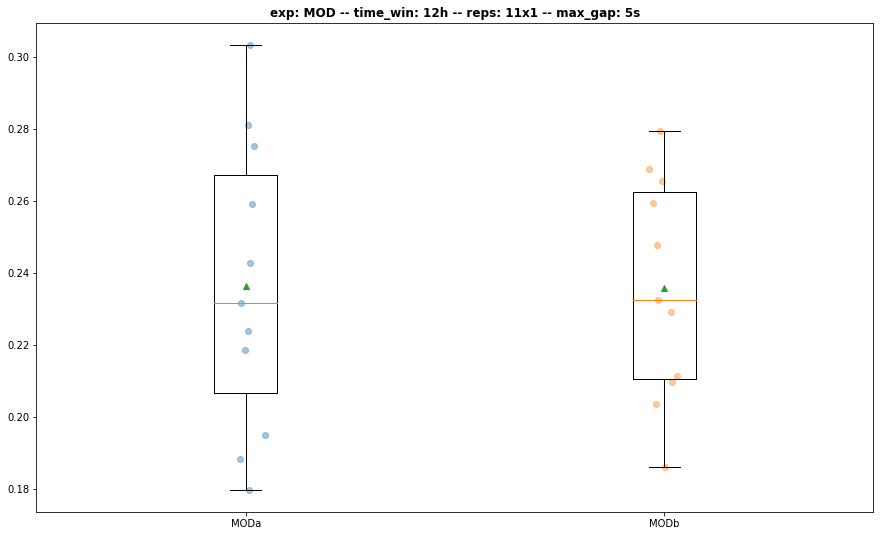

In [7]:
# --------- FILTERING ------------
reps_discarded = [20,41]
exp = 'MOD'
time_win = 12 #h
max_gap = 5 #s
p = 'MOD'

df_filt = df.loc[(df.time_win==3600 * time_win) & 
                 (df.max_gap==max_gap) & 
                (df.exp.isin([exp+'a',exp+'b'])) & 
                (~df.rep.isin(reps_discarded))]
df_filt.insert(4,'h', [int(str(a)[-8:-6]) for a in df_filt.start])
df_filt = df_filt.sort_values(['rep','h'])



# dataframe for a-b comparison

df_ab = pd.DataFrame()
df_ab.insert(0, p + 'a', list(df_filt[p].iloc[::2]))
df_ab.insert(1, p + 'b', list(df_filt[p].iloc[1::2]))
df_ab

    
# Plotting
vals, names, xs = [],[],[]
for i, col in enumerate(df_ab.columns):
    vals.append(df_ab[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.02, df_ab[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


    
box_plot = plt.boxplot(vals, labels=names, showmeans=True)
for x, val in zip(xs, vals):
    plt.scatter(x, val, alpha=0.4)

means = df_ab.mean()
stds =  df_ab.std()

        
#plt.ylim([0,.3])
fig = plt.title('exp: ' + exp + 
                ' -- time_win: ' + str(time_win) + 'h'
                ' -- reps: ' + str(int(len(df_ab)*time_win/12)) + 'x' + str(int(12/time_win)) + 
                ' -- max_gap: ' + str(max_gap) + 's',
               fontweight="bold")

plt.show()


In [42]:
# Stats

import statsmodels.api as sm

# --------- FILTERING ------------
reps_discarded = [20,41]
exp = 'MOD'
time_win = 4 #h
max_gap = 5 #s
p_list = ['MOD','wDIA','wDEN','wDEH']

df_filt = df.loc[(df.time_win==3600 * time_win) & 
                 (df.max_gap==max_gap) & 
                (df.exp.isin([exp+'a',exp+'b'])) & 
                (~df.rep.isin(reps_discarded))]
df_filt.insert(4,'h', [int(str(a)[-8:-6]) for a in df_filt.start])
df_filt = df_filt.sort_values(['rep','h'])



# dataframe for a-b comparison

df_ab = pd.DataFrame()
df_ab.insert(0, 'rep', list(df_filt['rep'].iloc[::2]))
df_ab.insert(1, 'date_exp', [str(a)[0:10] for a in df_filt['start'].iloc[::2]])
df_ab.insert(2,'h', [int(str(a)[-8:-6]) for a in df_filt['start'].iloc[::2]])
for p in p_list:
    df_ab.insert(3, p + 'a', list(df_filt[p].iloc[::2]))
    df_ab.insert(4, p + 'b', list(df_filt[p].iloc[1::2]))

    

df_ab.to_csv('NTM_df_stats.csv')
df_ab


,rep,date_exp,h,wDEHa,wDEHb,wDENa,wDENb,wDIAa,wDIAb,MODa,MODb
0,14,2021-09-13,9,4366.779460,4953.966855,0.003324,0.003295,0.033395,0.026260,0.402785,0.347699
1,14,2021-09-13,13,4892.277174,4360.601194,0.003398,0.003177,0.026159,0.025807,0.395059,0.299437
2,14,2021-09-13,17,4875.931394,4589.567872,0.003470,0.003468,0.023319,0.021348,0.394251,0.284116
3,17,2021-10-01,9,5994.714883,4788.083650,0.004725,0.004384,0.022843,0.028472,0.351834,0.395058
4,17,2021-10-01,13,5351.435955,4694.789795,0.004437,0.004400,0.023500,0.035388,0.317411,0.335334
5,17,2021-10-01,17,5314.329792,4400.869238,0.004188,0.004184,0.033296,0.029641,0.285761,0.325084
6,22,2021-10-11,9,4618.783205,4957.175691,0.003902,0.004389,0.018597,0.018322,0.259949,0.321070
7,22,2021-10-11,13,4597.547880,4572.566200,0.003885,0.003912,0.019876,0.022624,0.366747,0.290017
8,22,2021-10-11,17,4819.038910,4725.600101,0.003774,0.003944,0.018485,0.017993,0.320734,0.273581
9,27,2021-10-17,9,3844.625686,3538.502244,0.004155,0.003536,0.020983,0.017694,0.300303,0.298809
